In [1]:
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
%matplotlib inline

In [5]:
# Test file
test_data = []
test_label = []
test_path = os.path.join(pwd[0],'DataSample','TestSet')
for filename in os.listdir(test_path):
    imr = cv2.imread(os.path.join(test_path,filename))
    im = np.zeros(imr.shape[:2])
    im = imr[:,:,2]
    im = cv2.resize(im, (12,28))
    test_data.append(im)
    
test_data = np.array(test_data)
test_label = np.array(test_label)

# flatten
test_data_flat = test_data.reshape(len(test_data),-1)
# normalization
test_data_flat = test_data_flat/255

In [2]:
from sklearn.model_selection import train_test_split 
train_data = []
train_label = []

pwd = !pwd
train_path = os.path.join(pwd[0],'DataSample','charTrainsetmodified')

for label in os.listdir(train_path):
    folder = os.path.join(train_path, label)
    for filename in os.listdir(folder):
        train_label.append(label)
        imr = cv2.imread(os.path.join(folder,filename))
        im = np.zeros(imr.shape[:2])
        im = imr[:,:,2]
        im = cv2.resize(im, (30,60))
#         im = cv2.erode(im, np.ones((2,2)),iterations = 2)
        train_data.append(im)
    
train_data = np.array(train_data)
# train_label = np.array(train_label, dtype = np.int8)
train_label = np.array(train_label)

# flatten
train_data_flat = train_data.reshape(len(train_data),-1)

# normalization
train_data_flat = train_data_flat/255

print(f'Train dataset size: {train_data_flat.shape}')
print(f'Train label dataset size: {train_label.shape}')

Train dataset size: (3127, 1800)
Train label dataset size: (3127,)


'L'

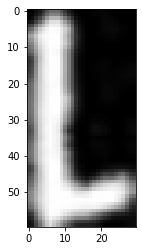

In [3]:
# test
i = np.random.randint(0,len(train_data))
plt.imshow(train_data[i].reshape(60,30),cmap = 'gray')
train_label[i]

## 2.3 Train model

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

In [24]:
hyper_params = [{'gamma':[1e-2,1e-3,1e-4],
                 'C':[0.01,0.1,1,10,100]}]

model = SVC(kernel = 'rbf')

model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'accuracy',
                        n_jobs = -1,
                        cv = 5,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(train_data_flat, train_label)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [25]:
print(f'Best params {model_cv.best_params_}')
print(f'Best accuracy {model_cv.best_score_}')

Best params {'C': 100, 'gamma': 0.001}
Best accuracy 0.9872380952380952


In [6]:
# clf = SVC(kernel = 'rbf',C = 100, gamma = 0.001)
clf = SVC()
clf.fit(train_data_flat, train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

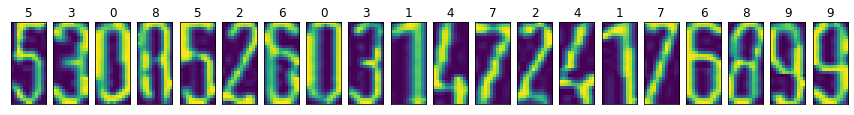

In [116]:
# predict test image
predictions = clf.predict(test_data_flat)

# print(f'accuracy {accuracy_score(predictions, test_label)}')
_, ax = plt.subplots(1,len(predictions), figsize = (15,5))
for i in range(len(predictions)):
    ax[i].imshow(test_data_flat[i].reshape(28,12))
    ax[i].set_title(predictions[i])
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [124]:
img = cv2.cvtColor(cv2.imread('C_1.jpg'), cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (60,30))
print((clf.predict(img.reshape(1,-1)/255)))

['Z']


### Save model

In [7]:
import pickle
pickle.dump(clf, open('character_without_prob_modified.pkl','wb'))
print('model saved')

model saved
